In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
from sqlalchemy import create_engine
import datetime as dt

print("All libraries imported successfully")

All libraries imported successfully


In [2]:
# Indian stock tickers
indian_tickers = [
    "RELIANCE.NS", "TCS.NS", "HDFCBANK.NS", "INFY.NS", "ICICIBANK.NS",
    "HINDUNILVR.NS", "SBIN.NS", "ITC.NS", "BHARTIARTL.NS", "LT.NS",
    "TATAMOTORS.NS", "AXISBANK.NS", "BAJFINANCE.NS", "M&M.NS", "ADANIPORTS.NS"
]

# Define 3-year date range
end_date = dt.datetime.today()
start_date = end_date - dt.timedelta(days=3*365)  # approx 3 years

print(f"Date range: {start_date.date()} to {end_date.date()}")

Date range: 2022-09-24 to 2025-09-23


In [3]:
# Dictionary to store each ticker's historical data
stock_data = {}

for ticker in indian_tickers:
    try:
        data = yf.download(
            ticker,
            start=start_date,
            end=end_date,
            auto_adjust=True  # Adjusted prices account for splits/dividends
        )
        if not data.empty:
            stock_data[ticker] = data
            print(f"✓ Successfully fetched {len(data)} days for {ticker}")
        else:
            print(f"✗ No data available for {ticker}")
    except Exception as e:
        print(f"✗ Error fetching {ticker}: {e}")

[*********************100%***********************]  1 of 1 completed


✓ Successfully fetched 741 days for RELIANCE.NS


[*********************100%***********************]  1 of 1 completed


✓ Successfully fetched 741 days for TCS.NS


[*********************100%***********************]  1 of 1 completed


✓ Successfully fetched 741 days for HDFCBANK.NS


[*********************100%***********************]  1 of 1 completed


✓ Successfully fetched 741 days for INFY.NS


[*********************100%***********************]  1 of 1 completed


✓ Successfully fetched 741 days for ICICIBANK.NS


[*********************100%***********************]  1 of 1 completed


✓ Successfully fetched 741 days for HINDUNILVR.NS


[*********************100%***********************]  1 of 1 completed


✓ Successfully fetched 741 days for SBIN.NS


[*********************100%***********************]  1 of 1 completed


✓ Successfully fetched 741 days for ITC.NS


[*********************100%***********************]  1 of 1 completed


✓ Successfully fetched 741 days for BHARTIARTL.NS


[*********************100%***********************]  1 of 1 completed


✓ Successfully fetched 741 days for LT.NS


[*********************100%***********************]  1 of 1 completed


✓ Successfully fetched 741 days for TATAMOTORS.NS


[*********************100%***********************]  1 of 1 completed


✓ Successfully fetched 741 days for AXISBANK.NS


[*********************100%***********************]  1 of 1 completed


✓ Successfully fetched 741 days for BAJFINANCE.NS


[*********************100%***********************]  1 of 1 completed


✓ Successfully fetched 741 days for M&M.NS


[*********************100%***********************]  1 of 1 completed

✓ Successfully fetched 741 days for ADANIPORTS.NS


In [4]:
for ticker, data in stock_data.items():
    try:
        ticker_obj = yf.Ticker(ticker)
        # Get latest daily data (current trading day if available)
        latest_data = ticker_obj.history(period="1d")
        
        if latest_data.empty:
            print(f"✗ No latest data for {ticker}")
            continue
        
        latest_date = latest_data.index[0]
        
        # Check if this date is already in the historical data
        if latest_date in data.index:
            print(f"✓ {ticker} already up to date ({latest_date.date()})")
            continue
        
        # Align and append the latest data
        latest_row = latest_data.iloc[0:1]  # Get as DataFrame
        
        # Ensure consistent column names
        for col in data.columns:
            if col not in latest_row.columns:
                latest_row.loc[:, col] = 0 if col == 'Volume' else float(latest_row['Close'].iloc[0])

        
        # Concatenate and sort
        stock_data[ticker] = pd.concat([data, latest_row])
        stock_data[ticker].sort_index(inplace=True)
        
        print(f"✓ Updated {ticker} with data for {latest_date.date()}")
        
    except Exception as e:
        print(f"✗ Error updating {ticker}: {e}")

print("Live price update completed")

C:\Users\Sanskaar chauhan\AppData\Local\Temp\ipykernel_49212\3701647875.py:24: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1389.800048828125' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  latest_row.loc[:, col] = 0 if col == 'Volume' else float(latest_row['Close'].iloc[0])
C:\Users\Sanskaar chauhan\AppData\Local\Temp\ipykernel_49212\3701647875.py:24: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '3062.39990234375' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  latest_row.loc[:, col] = 0 if col == 'Volume' else float(latest_row['Close'].iloc[0])


✗ Error updating RELIANCE.NS: Cannot compare tz-naive and tz-aware timestamps
✗ Error updating TCS.NS: Cannot compare tz-naive and tz-aware timestamps


C:\Users\Sanskaar chauhan\AppData\Local\Temp\ipykernel_49212\3701647875.py:24: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '957.2000122070312' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  latest_row.loc[:, col] = 0 if col == 'Volume' else float(latest_row['Close'].iloc[0])
C:\Users\Sanskaar chauhan\AppData\Local\Temp\ipykernel_49212\3701647875.py:24: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1497.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  latest_row.loc[:, col] = 0 if col == 'Volume' else float(latest_row['Close'].iloc[0])


✗ Error updating HDFCBANK.NS: Cannot compare tz-naive and tz-aware timestamps
✗ Error updating INFY.NS: Cannot compare tz-naive and tz-aware timestamps


C:\Users\Sanskaar chauhan\AppData\Local\Temp\ipykernel_49212\3701647875.py:24: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1394.300048828125' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  latest_row.loc[:, col] = 0 if col == 'Volume' else float(latest_row['Close'].iloc[0])
C:\Users\Sanskaar chauhan\AppData\Local\Temp\ipykernel_49212\3701647875.py:24: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2522.199951171875' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  latest_row.loc[:, col] = 0 if col == 'Volume' else float(latest_row['Close'].iloc[0])


✗ Error updating ICICIBANK.NS: Cannot compare tz-naive and tz-aware timestamps
✗ Error updating HINDUNILVR.NS: Cannot compare tz-naive and tz-aware timestamps


C:\Users\Sanskaar chauhan\AppData\Local\Temp\ipykernel_49212\3701647875.py:24: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '870.5999755859375' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  latest_row.loc[:, col] = 0 if col == 'Volume' else float(latest_row['Close'].iloc[0])


✗ Error updating SBIN.NS: Cannot compare tz-naive and tz-aware timestamps


C:\Users\Sanskaar chauhan\AppData\Local\Temp\ipykernel_49212\3701647875.py:24: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '403.20001220703125' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  latest_row.loc[:, col] = 0 if col == 'Volume' else float(latest_row['Close'].iloc[0])
C:\Users\Sanskaar chauhan\AppData\Local\Temp\ipykernel_49212\3701647875.py:24: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1938.699951171875' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  latest_row.loc[:, col] = 0 if col == 'Volume' else float(latest_row['Close'].iloc[0])


✗ Error updating ITC.NS: Cannot compare tz-naive and tz-aware timestamps
✗ Error updating BHARTIARTL.NS: Cannot compare tz-naive and tz-aware timestamps


C:\Users\Sanskaar chauhan\AppData\Local\Temp\ipykernel_49212\3701647875.py:24: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '3657.60009765625' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  latest_row.loc[:, col] = 0 if col == 'Volume' else float(latest_row['Close'].iloc[0])
C:\Users\Sanskaar chauhan\AppData\Local\Temp\ipykernel_49212\3701647875.py:24: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '701.3499755859375' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  latest_row.loc[:, col] = 0 if col == 'Volume' else float(latest_row['Close'].iloc[0])


✗ Error updating LT.NS: Cannot compare tz-naive and tz-aware timestamps
✗ Error updating TATAMOTORS.NS: Cannot compare tz-naive and tz-aware timestamps


C:\Users\Sanskaar chauhan\AppData\Local\Temp\ipykernel_49212\3701647875.py:24: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1170.800048828125' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  latest_row.loc[:, col] = 0 if col == 'Volume' else float(latest_row['Close'].iloc[0])
C:\Users\Sanskaar chauhan\AppData\Local\Temp\ipykernel_49212\3701647875.py:24: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1025.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  latest_row.loc[:, col] = 0 if col == 'Volume' else float(latest_row['Close'].iloc[0])


✗ Error updating AXISBANK.NS: Cannot compare tz-naive and tz-aware timestamps
✗ Error updating BAJFINANCE.NS: Cannot compare tz-naive and tz-aware timestamps
✗ Error updating M&M.NS: Cannot compare tz-naive and tz-aware timestamps
✗ Error updating ADANIPORTS.NS: Cannot compare tz-naive and tz-aware timestamps
Live price update completed


C:\Users\Sanskaar chauhan\AppData\Local\Temp\ipykernel_49212\3701647875.py:24: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '3614.60009765625' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  latest_row.loc[:, col] = 0 if col == 'Volume' else float(latest_row['Close'].iloc[0])
C:\Users\Sanskaar chauhan\AppData\Local\Temp\ipykernel_49212\3701647875.py:24: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1441.5999755859375' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  latest_row.loc[:, col] = 0 if col == 'Volume' else float(latest_row['Close'].iloc[0])


In [5]:
print("TATAMOTORS.NS data preview:")
print(stock_data["TATAMOTORS.NS"].tail())
print(f"\nData shape: {stock_data['TATAMOTORS.NS'].shape}")

TATAMOTORS.NS data preview:
                           (Close, TATAMOTORS.NS)  (High, TATAMOTORS.NS)  \
Date                                                                       
2025-09-18 00:00:00                    711.200012             725.250000   
2025-09-19 00:00:00                    707.450012             713.500000   
2025-09-22 00:00:00                    696.250000             712.000000   
2025-09-23 00:00:00                    701.349976             707.799988   
2025-09-23 00:00:00+05:30                     NaN                    NaN   

                           (Low, TATAMOTORS.NS)  (Open, TATAMOTORS.NS)  \
Date                                                                     
2025-09-18 00:00:00                  707.599976             722.000000   
2025-09-19 00:00:00                  704.950012             713.500000   
2025-09-22 00:00:00                  694.849976             709.000000   
2025-09-23 00:00:00                  697.000000             701.79998

In [6]:
# Create a list to hold the processed dataframes
processed_dfs = []

for ticker, data in stock_data.items():
    try:
        # Reset the index to make Date a column
        df = data.reset_index()
        df.rename(columns={'index': 'Date'}, inplace=True)
        
        # Add a 'Ticker' column to identify the stock
        df['Ticker'] = ticker
        
        # Ensure 'Adj Close' column exists
        if 'Adj Close' not in df.columns:
            df['Adj Close'] = df['Close']
        
        # Select and reorder columns
        df = df[['Date', 'Ticker', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]
        
        # Append the processed dataframe to the list
        processed_dfs.append(df)
        
        print(f"✓ Processed {ticker}: {len(df)} rows")
        
    except Exception as e:
        print(f"✗ Error processing {ticker}: {e}")

# Concatenate all tickers into a single DataFrame
combined_df = pd.concat(processed_dfs, ignore_index=True)

# Fill missing values with forward fill (OHLCV data)
combined_df.ffill(inplace=True)

print(f"\nCombined DataFrame shape: {combined_df.shape}")
print("Data has been successfully processed and combined")

✓ Processed RELIANCE.NS: 742 rows
✓ Processed TCS.NS: 742 rows
✓ Processed HDFCBANK.NS: 742 rows
✓ Processed INFY.NS: 742 rows
✓ Processed ICICIBANK.NS: 742 rows
✓ Processed HINDUNILVR.NS: 742 rows
✓ Processed SBIN.NS: 742 rows
✓ Processed ITC.NS: 742 rows
✓ Processed BHARTIARTL.NS: 742 rows
✓ Processed LT.NS: 742 rows
✓ Processed TATAMOTORS.NS: 742 rows
✓ Processed AXISBANK.NS: 742 rows
✓ Processed BAJFINANCE.NS: 742 rows
✓ Processed M&M.NS: 742 rows
✓ Processed ADANIPORTS.NS: 742 rows

Combined DataFrame shape: (11130, 8)
Data has been successfully processed and combined


In [7]:
# The corrected code for Cell 7

# 1. Ensure Date column is timezone-naive
combined_df['Date'] = pd.to_datetime(combined_df['Date'], utc=True)   # force into UTC
combined_df['Date'] = combined_df['Date'].dt.tz_convert(None)        # strip timezone

# 2. Sort by Ticker and Date
combined_df.sort_values(by=['Ticker', 'Date'], inplace=True)

# 3. Daily Returns: The percentage change from one day to the next
combined_df['Daily Return'] = combined_df.groupby('Ticker')['Adj Close'].pct_change(fill_method=None)

# 4. Moving Averages: 20-day and 50-day Simple Moving Averages (SMA)
combined_df['SMA_20'] = combined_df.groupby('Ticker')['Close'].transform(lambda x: x.rolling(window=20).mean())
combined_df['SMA_50'] = combined_df.groupby('Ticker')['Close'].transform(lambda x: x.rolling(window=50).mean())

# 5. Volume Change: The percentage change in trading volume
combined_df['Volume Change'] = combined_df.groupby('Ticker')['Volume'].pct_change(fill_method=None)

# Display
print("DataFrame with engineered features:")
print(combined_df.tail())


DataFrame with engineered features:
                    Date  Ticker         Open         High          Low  \
1479 2025-09-18 00:00:00  TCS.NS  1389.800049  1389.800049  1389.800049   
1480 2025-09-19 00:00:00  TCS.NS  1389.800049  1389.800049  1389.800049   
1481 2025-09-22 00:00:00  TCS.NS  1389.800049  1389.800049  1389.800049   
1483 2025-09-22 18:30:00  TCS.NS  3062.399902  3062.399902  3062.399902   
1482 2025-09-23 00:00:00  TCS.NS  1389.800049  1389.800049  1389.800049   

            Close    Adj Close       Volume  Daily Return       SMA_20  \
1479  1389.800049  1389.800049  1389.800049      0.000000  1389.800049   
1480  1389.800049  1389.800049  1389.800049      0.000000  1389.800049   
1481  1389.800049  1389.800049  1389.800049      0.000000  1389.800049   
1483  3062.399902  3062.399902  3062.399902      1.203482  1473.430042   
1482  1389.800049  1389.800049  1389.800049     -0.546173  1473.430042   

           SMA_50  Volume Change  
1479  1389.800049       0.000000 

In [8]:
print("=== Basic Data Overview ===")
print(f"DataFrame Shape: {combined_df.shape}")
print("\nColumn Names and Data Types:")
print(combined_df.info())
print("\nSummary Statistics (Numerical Columns):")
print(combined_df.describe())
# Quick peek at the data
print("\nFirst 5 Rows:")
print(combined_df.head())


=== Basic Data Overview ===
DataFrame Shape: (11130, 12)

Column Names and Data Types:
<class 'pandas.core.frame.DataFrame'>
Index: 11130 entries, 10388 to 1482
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           11130 non-null  datetime64[ns]
 1   Ticker         11130 non-null  object        
 2   Open           10389 non-null  float64       
 3   High           10389 non-null  float64       
 4   Low            10389 non-null  float64       
 5   Close          10389 non-null  float64       
 6   Adj Close      10389 non-null  float64       
 7   Volume         10389 non-null  float64       
 8   Daily Return   10374 non-null  float64       
 9   SMA_20         10122 non-null  float64       
 10  SMA_50         9702 non-null   float64       
 11  Volume Change  10374 non-null  float64       
dtypes: datetime64[ns](1), float64(10), object(1)
memory usage: 1.1+ MB
None

Summary Statis

=== Missing Values Analysis ===
Missing Values per Column:
Date                0
Ticker              0
Open              741
High              741
Low               741
Close             741
Adj Close         741
Volume            741
Daily Return      756
SMA_20           1008
SMA_50           1428
Volume Change     756
dtype: int64

Percentage of Missing Values:
Date              0.000000
Ticker            0.000000
Open              6.657682
High              6.657682
Low               6.657682
Close             6.657682
Adj Close         6.657682
Volume            6.657682
Daily Return      6.792453
SMA_20            9.056604
SMA_50           12.830189
Volume Change     6.792453
dtype: float64


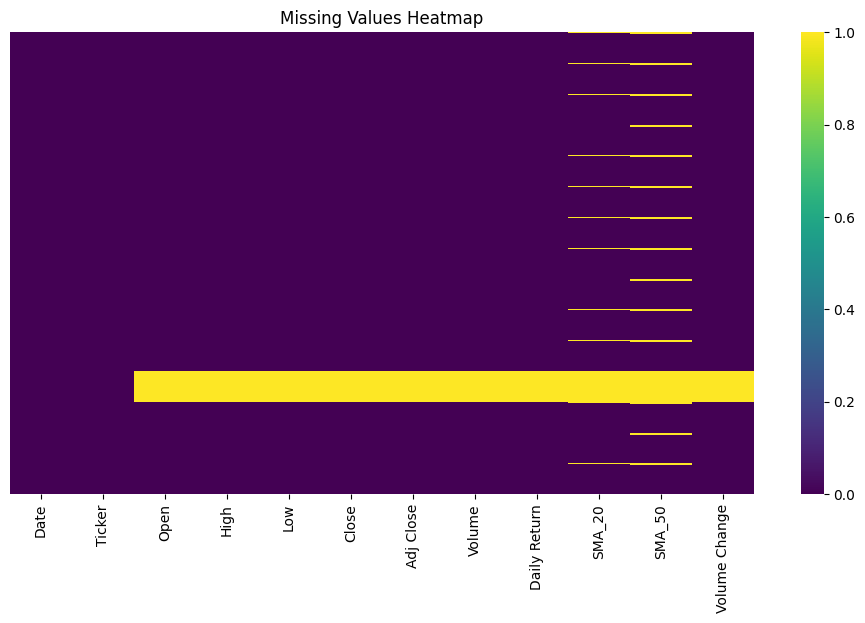


After filling: Total missing values = 0


C:\Users\Sanskaar chauhan\AppData\Local\Temp\ipykernel_49212\1206270658.py:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_df.fillna(method='ffill', inplace=True)
C:\Users\Sanskaar chauhan\AppData\Local\Temp\ipykernel_49212\1206270658.py:19: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_df.fillna(method='bfill', inplace=True)  # Backward fill for any leading NaNs


In [9]:
#Handle and analyze missing values
print("=== Missing Values Analysis ===")
missing_summary = combined_df.isnull().sum()
print("Missing Values per Column:")
print(missing_summary)

# Percentage of missing values
print("\nPercentage of Missing Values:")
print((missing_summary / len(combined_df)) * 100)

# Visualize missing values (using seaborn heatmap for clarity)
plt.figure(figsize=(12, 6))
sns.heatmap(combined_df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# If there are still NaNs (e.g., in returns or SMAs), fill them (forward fill for time series)
combined_df.fillna(method='ffill', inplace=True)
combined_df.fillna(method='bfill', inplace=True)  # Backward fill for any leading NaNs
print(f"\nAfter filling: Total missing values = {combined_df.isnull().sum().sum()}")


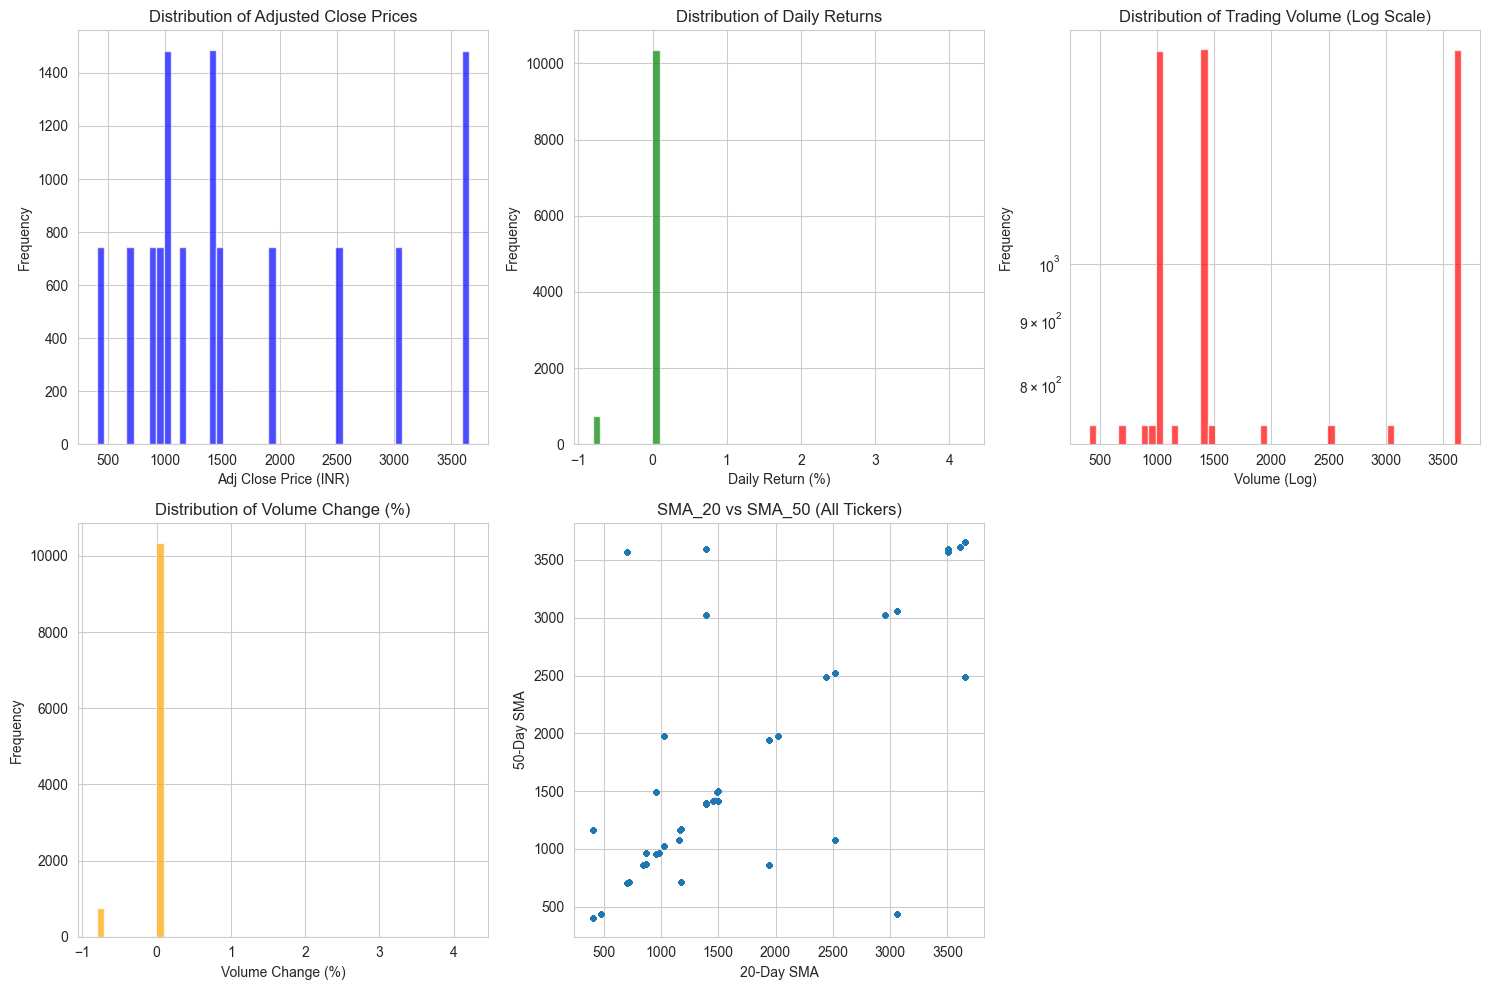

Key Insights: Daily returns are roughly normal (check for skewness). Volumes are right-skewed.


In [10]:
#Univariate distributions for key features (e.g., Close Price, Daily Returns, Volume)
# Set style for better plots
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))

# Subplot 1: Distribution of Adj Close Prices (across all tickers)
plt.subplot(2, 3, 1)
combined_df['Adj Close'].hist(bins=50, alpha=0.7, color='blue')
plt.title('Distribution of Adjusted Close Prices')
plt.xlabel('Adj Close Price (INR)')
plt.ylabel('Frequency')

# Subplot 2: Distribution of Daily Returns
plt.subplot(2, 3, 2)
combined_df['Daily Return'].hist(bins=50, alpha=0.7, color='green')
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return (%)')
plt.ylabel('Frequency')

# Subplot 3: Distribution of Volume
plt.subplot(2, 3, 3)
combined_df['Volume'].hist(bins=50, alpha=0.7, color='red', log=True)  # Log scale for volume
plt.title('Distribution of Trading Volume (Log Scale)')
plt.xlabel('Volume (Log)')
plt.ylabel('Frequency')

# Subplot 4: Distribution of Volume Change
plt.subplot(2, 3, 4)
combined_df['Volume Change'].hist(bins=50, alpha=0.7, color='orange')
plt.title('Distribution of Volume Change (%)')
plt.xlabel('Volume Change (%)')
plt.ylabel('Frequency')

# Subplot 5: SMA_20 vs SMA_50 (scatter for trend insight)
plt.subplot(2, 3, 5)
plt.scatter(combined_df['SMA_20'], combined_df['SMA_50'], alpha=0.5, s=10)
plt.title('SMA_20 vs SMA_50 (All Tickers)')
plt.xlabel('20-Day SMA')
plt.ylabel('50-Day SMA')

plt.tight_layout()
plt.show()

print("Key Insights: Daily returns are roughly normal (check for skewness). Volumes are right-skewed.")


=== Correlation Matrix (Top Correlations) ===
Daily Return     1.000000
Volume Change    1.000000
High             0.166780
Open             0.166780
Low              0.166780
Close            0.166780
Volume           0.166780
Adj Close        0.166780
SMA_50           0.153930
SMA_20           0.136161
Name: Daily Return, dtype: float64


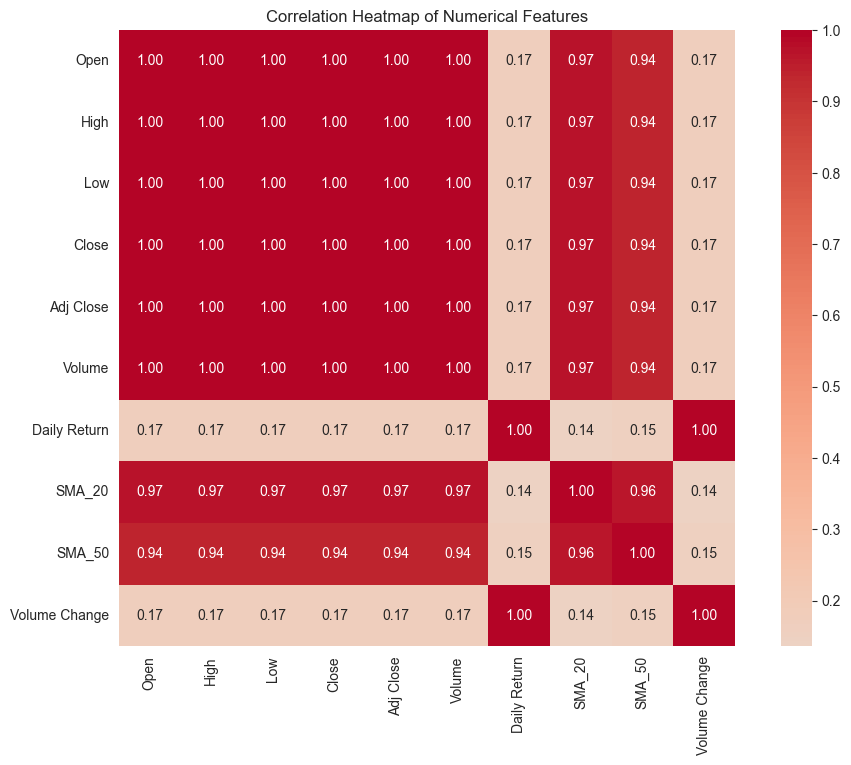

Key Insights: High correlation between OHLC prices (expected). Check for multicollinearity in models.


In [11]:
#Correlation matrix for numerical features
# Select numerical columns for correlation
numerical_cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Daily Return', 'SMA_20', 'SMA_50', 'Volume Change']
corr_matrix = combined_df[numerical_cols].corr()

print("=== Correlation Matrix (Top Correlations) ===")
print(corr_matrix['Daily Return'].sort_values(ascending=False))  # Focus on Daily Return correlations

# Heatmap visualization
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, square=True, fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

print("Key Insights: High correlation between OHLC prices (expected). Check for multicollinearity in models.")

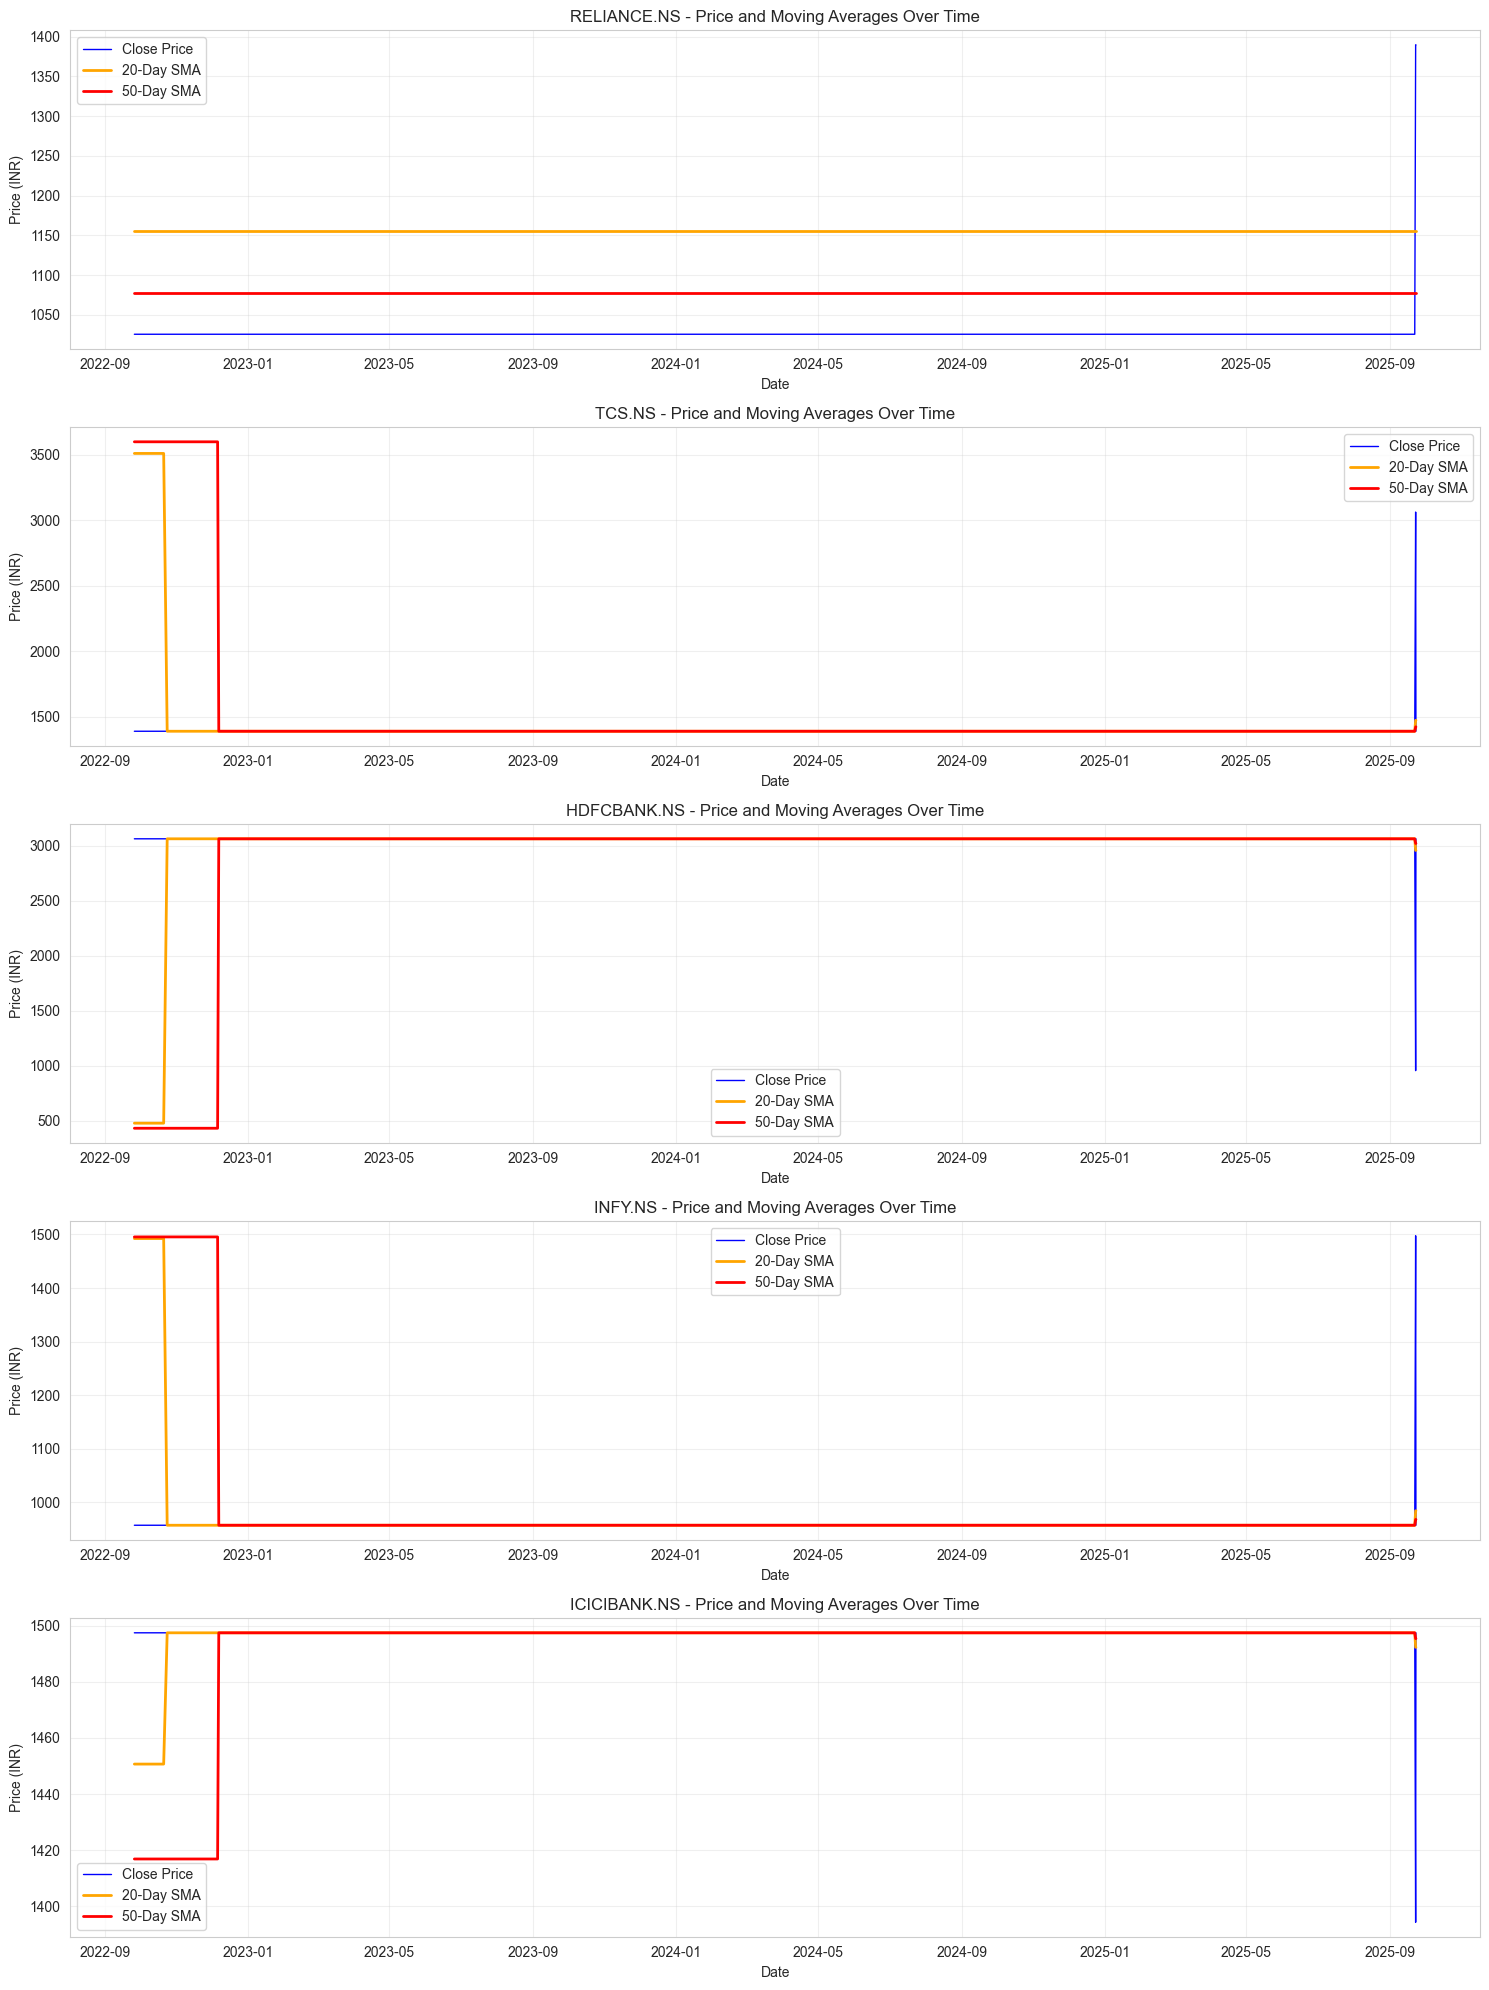

Key Insights: Observe trends, crossovers in SMAs (e.g., golden cross for buy signals).


In [12]:
# Time series plots for Close Prices and Moving Averages (one plot per ticker)
# We'll create a subplot for each ticker (limit to first 5 for brevity; adjust as needed)
tickers_to_plot = indian_tickers[:5]  # Plot first 5 tickers; change to all if desired
fig, axes = plt.subplots(len(tickers_to_plot), 1, figsize=(15, 4*len(tickers_to_plot)))
if len(tickers_to_plot) == 1:
    axes = [axes]  # Handle single subplot

for i, ticker in enumerate(tickers_to_plot):
    ticker_data = combined_df[combined_df['Ticker'] == ticker].sort_values('Date')
    
    axes[i].plot(ticker_data['Date'], ticker_data['Close'], label='Close Price', color='blue', linewidth=1)
    axes[i].plot(ticker_data['Date'], ticker_data['SMA_20'], label='20-Day SMA', color='orange', linewidth=2)
    axes[i].plot(ticker_data['Date'], ticker_data['SMA_50'], label='50-Day SMA', color='red', linewidth=2)
    axes[i].set_title(f'{ticker} - Price and Moving Averages Over Time')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Price (INR)')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Key Insights: Observe trends, crossovers in SMAs (e.g., golden cross for buy signals).")

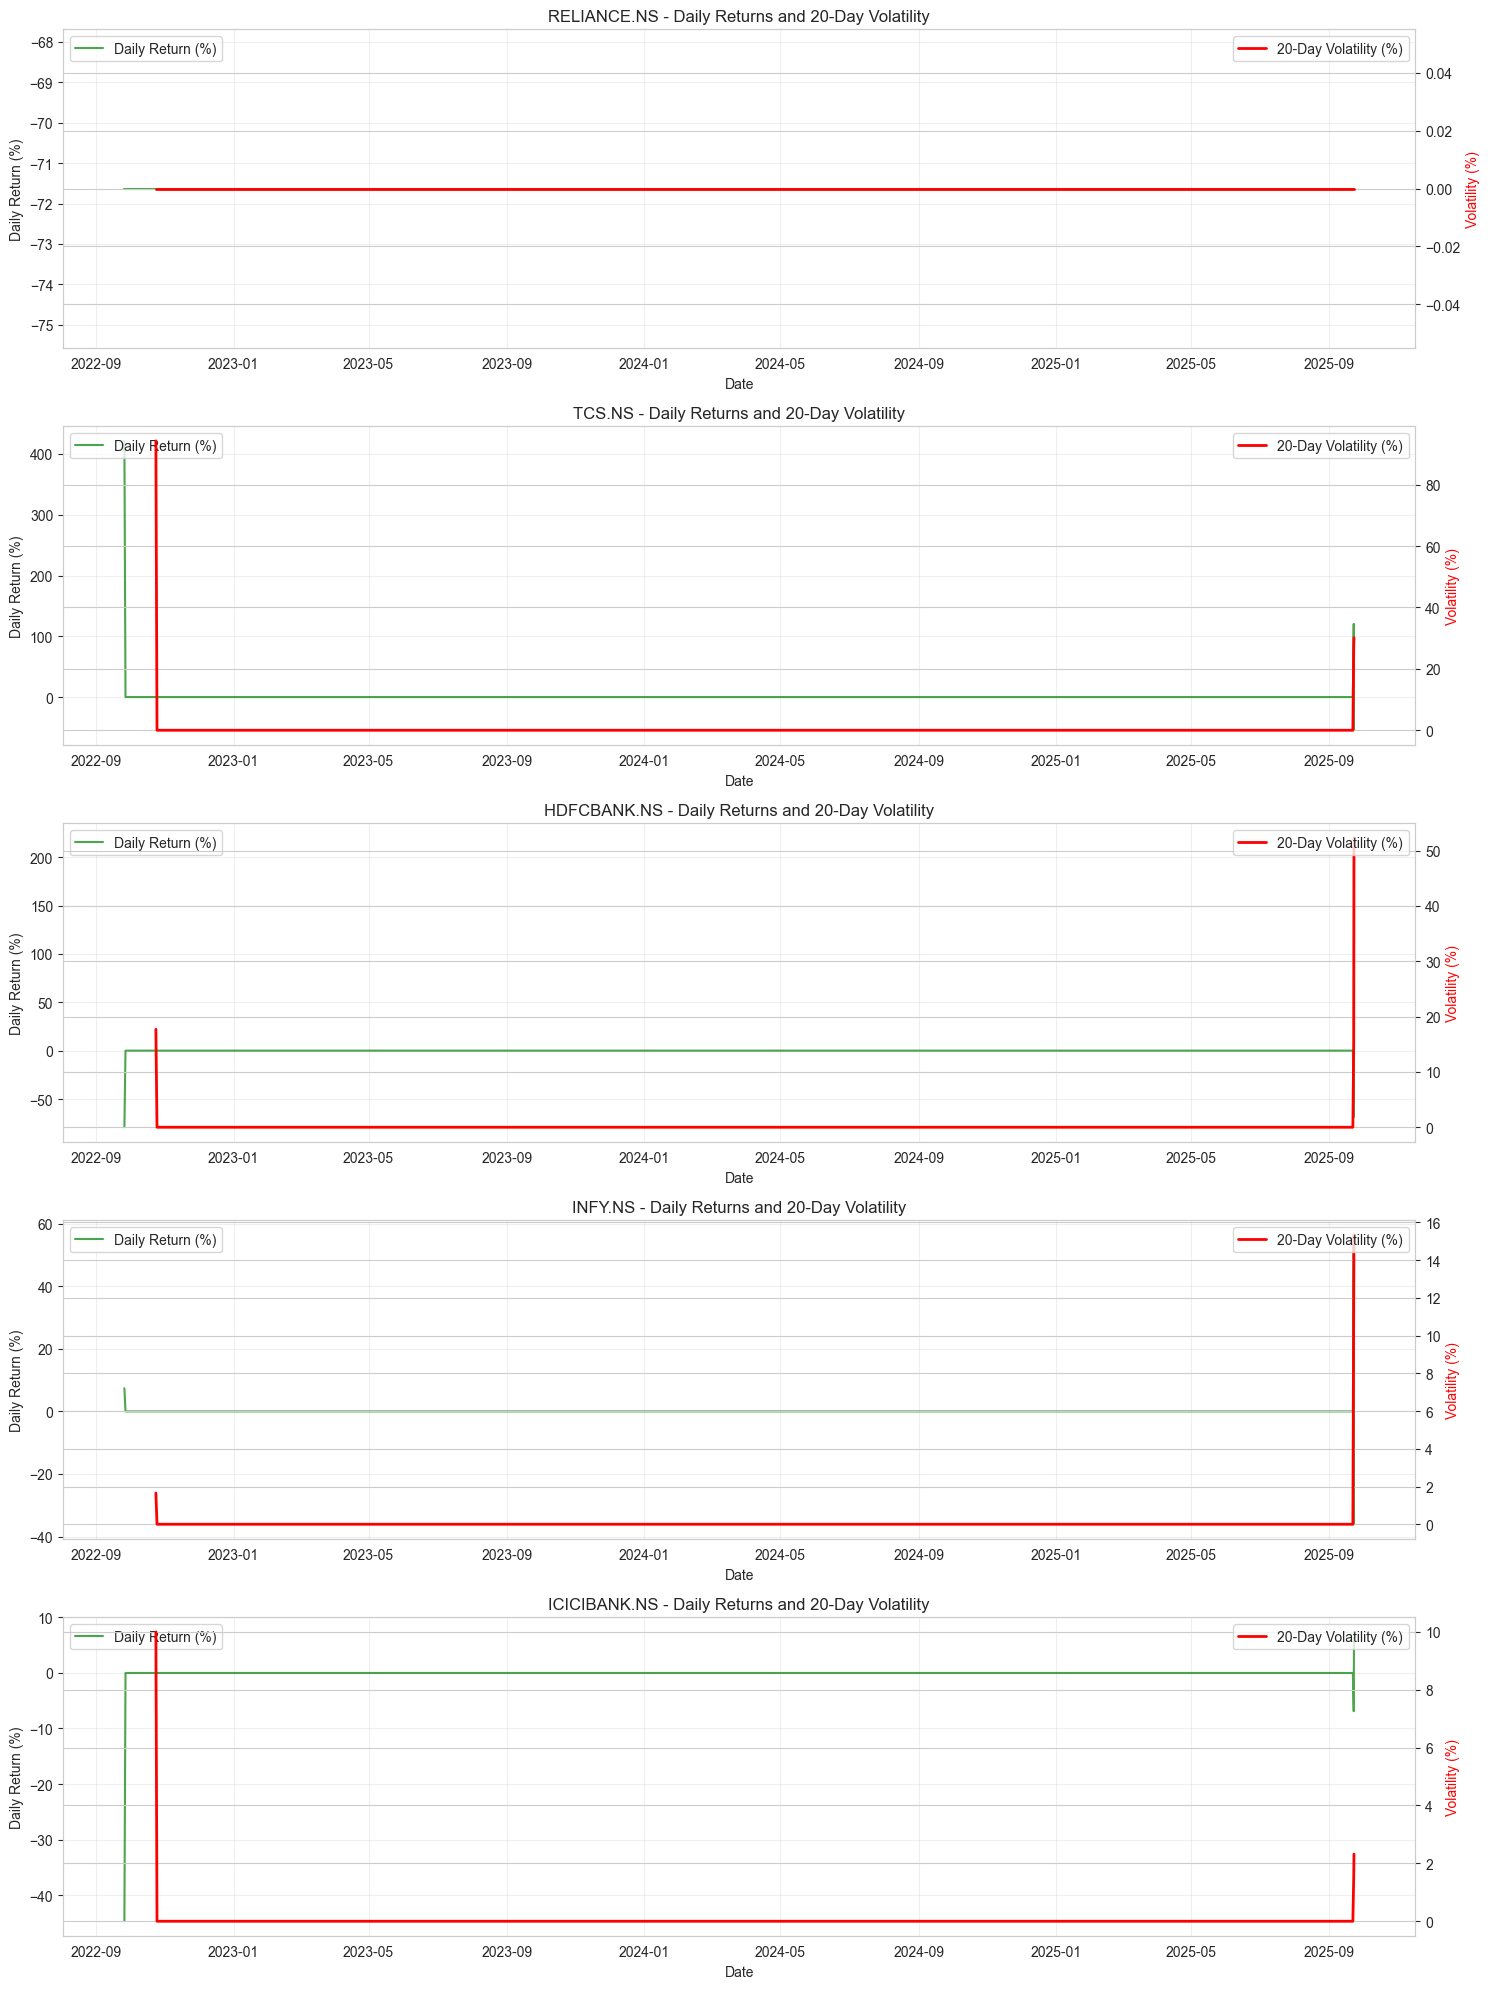

Key Insights: High volatility periods may indicate market events. Returns show trends or stationarity.


In [13]:
# Time series of Daily Returns and Rolling Volatility (per ticker)
# Compute rolling 20-day volatility (std dev of returns)
combined_df['Volatility_20'] = combined_df.groupby('Ticker')['Daily Return'].transform(lambda x: x.rolling(window=20).std())

tickers_to_plot = indian_tickers[:5]  # First 5 for brevity
fig, axes = plt.subplots(len(tickers_to_plot), 1, figsize=(15, 4*len(tickers_to_plot)))
if len(tickers_to_plot) == 1:
    axes = [axes]

for i, ticker in enumerate(tickers_to_plot):
    ticker_data = combined_df[combined_df['Ticker'] == ticker].sort_values('Date')
    
    # Plot returns
    axes[i].plot(ticker_data['Date'], ticker_data['Daily Return'] * 100, label='Daily Return (%)', color='green', alpha=0.7)
    # Plot volatility (secondary y-axis)
    ax2 = axes[i].twinx()
    ax2.plot(ticker_data['Date'], ticker_data['Volatility_20'] * 100, label='20-Day Volatility (%)', color='red', linewidth=2)
    ax2.set_ylabel('Volatility (%)', color='red')
    
    axes[i].set_title(f'{ticker} - Daily Returns and 20-Day Volatility')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Daily Return (%)')
    axes[i].legend(loc='upper left')
    ax2.legend(loc='upper right')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Key Insights: High volatility periods may indicate market events. Returns show trends or stationarity.")

C:\Users\Sanskaar chauhan\AppData\Local\Temp\ipykernel_49212\2132450642.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i].legend(loc='upper left')


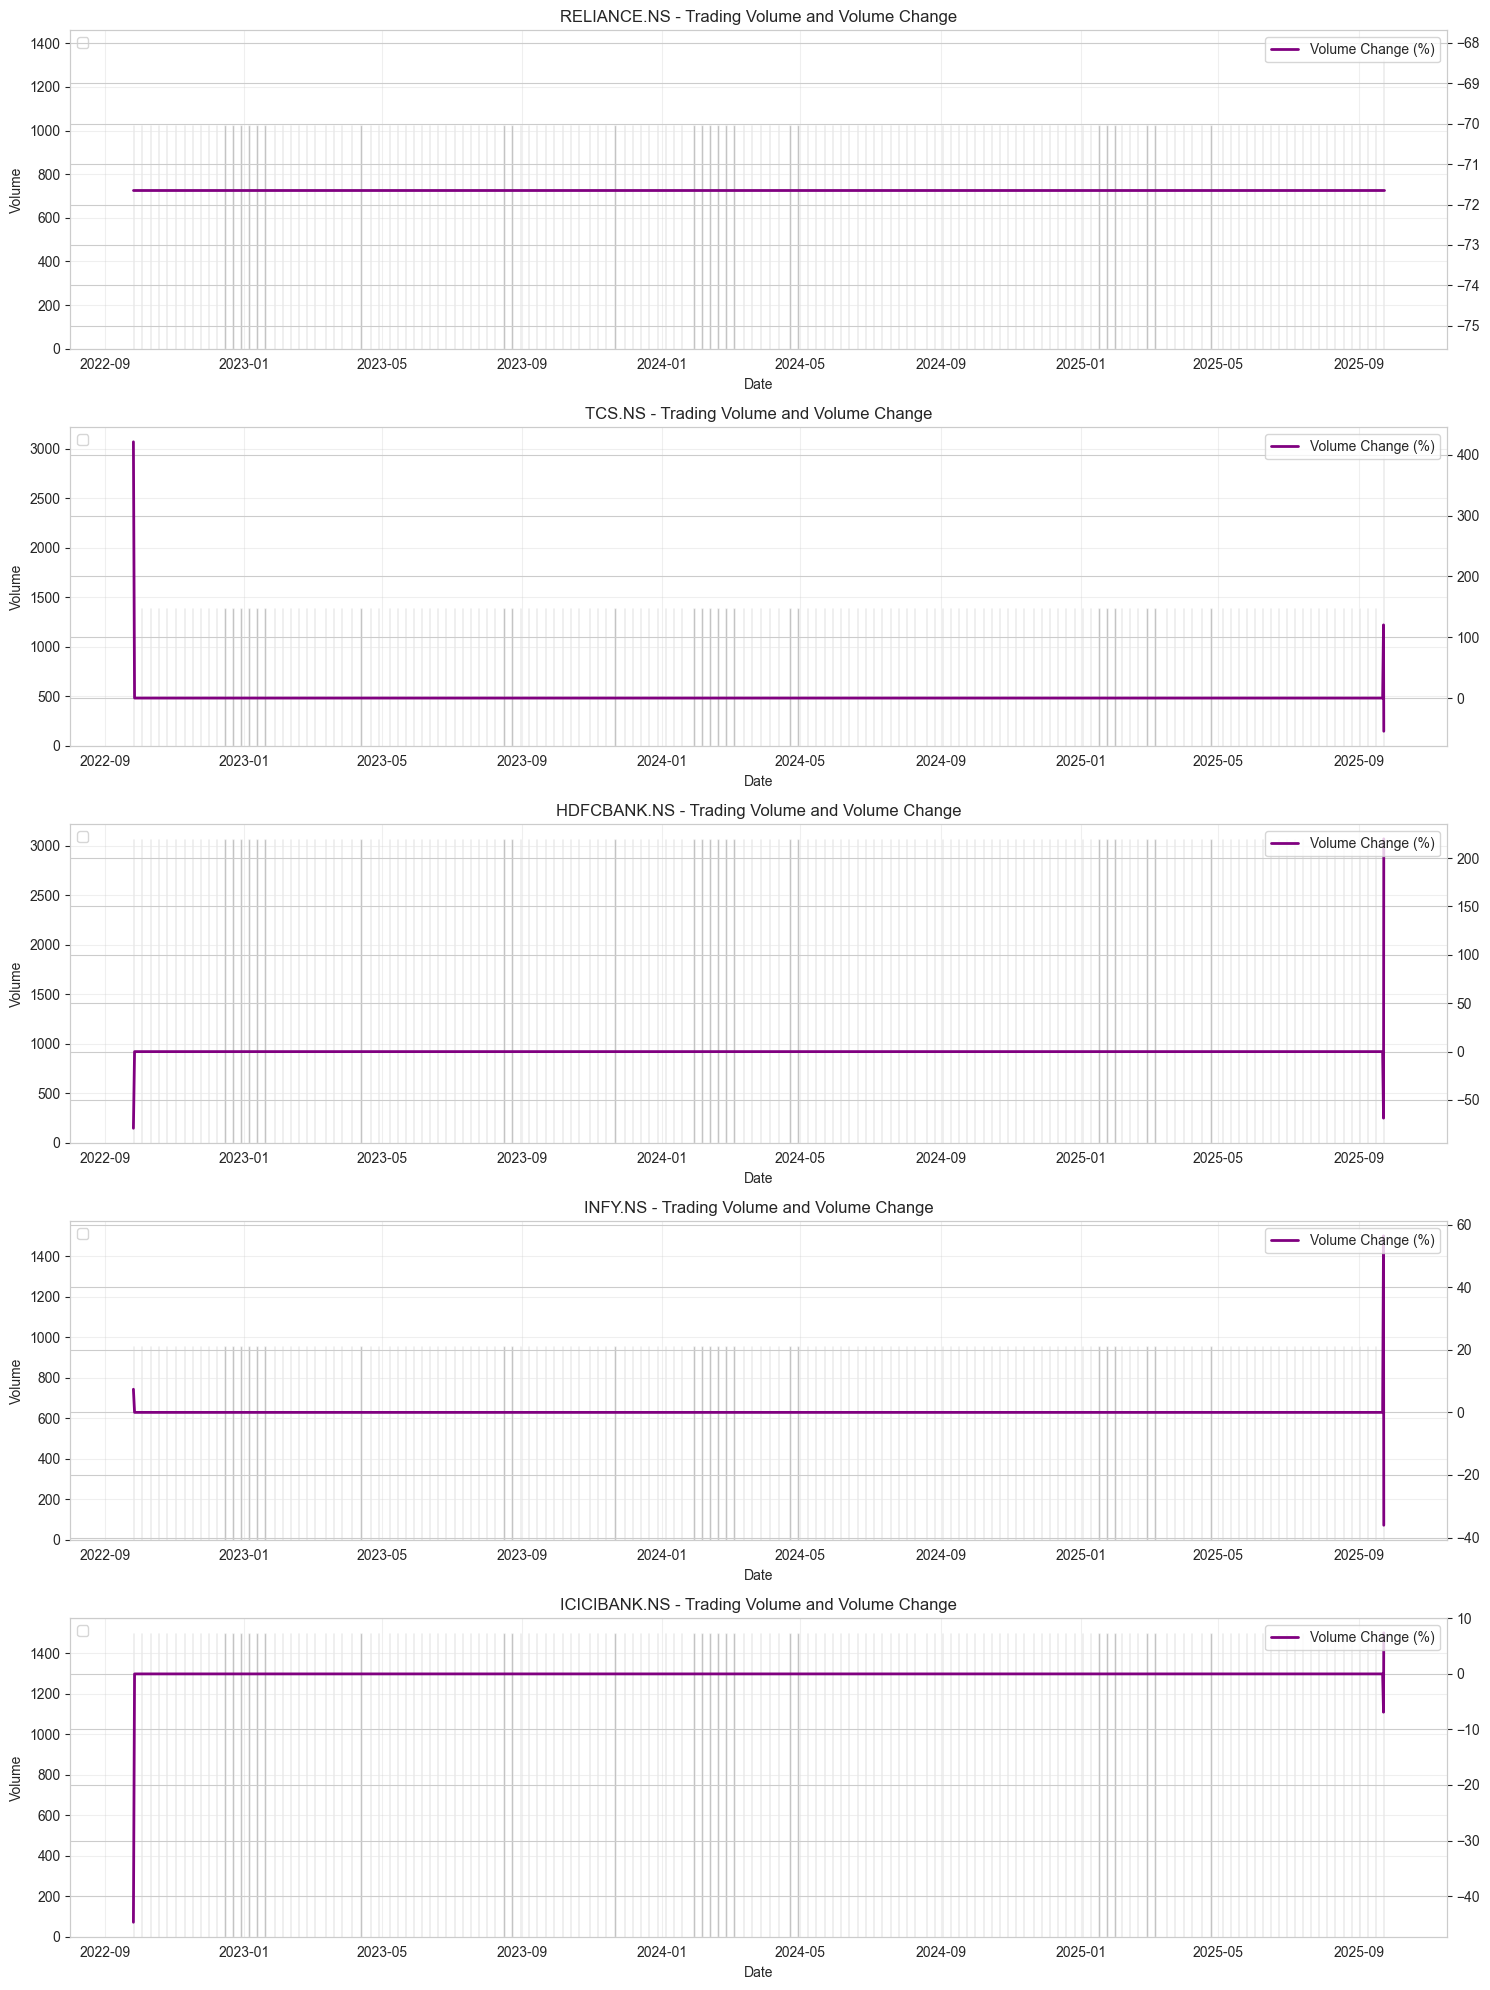

=== Overall Volume Insights ===
                  mean     std     max
Ticker                                
ADANIPORTS.NS  3611.67   79.77  3614.6
AXISBANK.NS     701.98   17.23  1170.8
BAJFINANCE.NS  1170.60    5.33  1170.8
BHARTIARTL.NS   405.27   56.37  1938.7
HDFCBANK.NS    3059.56   77.28  3062.4
HINDUNILVR.NS  1395.82   41.41  2522.2
ICICIBANK.NS   1497.36    3.79  1497.5
INFY.NS         957.93   19.84  1497.5
ITC.NS          869.97   17.16   870.6
LT.NS          1941.02   63.10  3657.6
M&M.NS         1028.99   95.05  3614.6
RELIANCE.NS    1026.48   18.90  1389.8
SBIN.NS        2519.97   60.63  2522.2
TATAMOTORS.NS  3653.62  108.53  3657.6
TCS.NS         1392.05   61.40  3062.4


In [14]:
# Volume trends and Volume Change visualization
tickers_to_plot = indian_tickers[:5]  # First 5
fig, axes = plt.subplots(len(tickers_to_plot), 1, figsize=(15, 4*len(tickers_to_plot)))
if len(tickers_to_plot) == 1:
    axes = [axes]

for i, ticker in enumerate(tickers_to_plot):
    ticker_data = combined_df[combined_df['Ticker'] == ticker].sort_values('Date')
    
    # Bar plot for volume (subsample if too dense; here we use every 5th point for clarity if needed)
    dates_sample = ticker_data['Date'][::5]  # Sample for bar plot to avoid overcrowding
    volumes_sample = ticker_data['Volume'][::5]
    axes[i].bar(dates_sample, volumes_sample, alpha=0.6, color='gray', width=1)
    
    # Line for volume change (full data)
    ax2 = axes[i].twinx()
    ax2.plot(ticker_data['Date'], ticker_data['Volume Change'] * 100, label='Volume Change (%)', color='purple', linewidth=2)
    
    axes[i].set_title(f'{ticker} - Trading Volume and Volume Change')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Volume')
    axes[i].legend(loc='upper left')
    ax2.legend(loc='upper right')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Overall volume summary
print("=== Overall Volume Insights ===")
print(combined_df.groupby('Ticker')['Volume'].agg(['mean', 'std', 'max']).round(2))

C:\Users\Sanskaar chauhan\AppData\Local\Temp\ipykernel_49212\3919989134.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined_df, x='Ticker', y='Daily Return', palette='Set2')


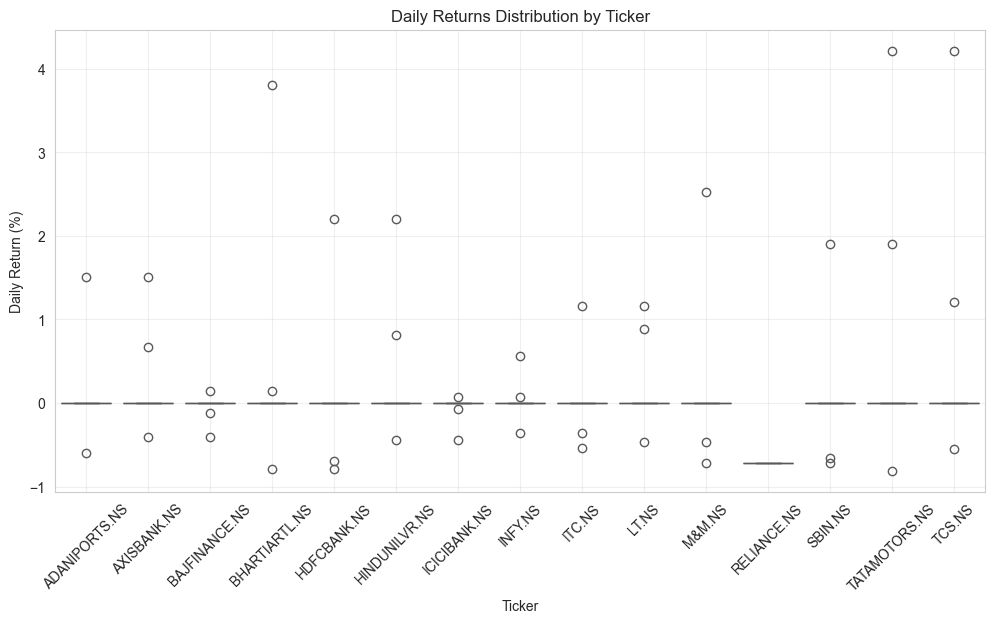

=== Daily Returns Summary by Ticker ===
                mean    std    min     max
Ticker                                    
ADANIPORTS.NS   0.12   5.96 -60.12  150.74
AXISBANK.NS     0.24   6.23 -40.10  150.74
BAJFINANCE.NS  -0.05   1.63 -40.10   14.17
BHARTIARTL.NS   0.43  14.29 -79.20  380.83
HDFCBANK.NS     0.10   8.95 -79.20  219.93
HINDUNILVR.NS   0.35   8.76 -44.72  219.93
ICICIBANK.NS   -0.06   1.68 -44.72    7.40
INFY.NS         0.04   2.48 -36.08   56.45
ITC.NS          0.04   4.88 -53.69  115.92
LT.NS           0.21   5.63 -47.00  115.92
M&M.NS          0.18   9.79 -71.63  252.47
RELIANCE.NS   -71.63   0.00 -71.63  -71.63
SBIN.NS         0.07   7.83 -71.63  189.71
TATAMOTORS.NS   0.71  17.22 -80.82  421.51
TCS.NS          0.66  16.21 -54.62  421.51

Key Insights: Compare volatility (std) and average returns across stocks.


In [15]:
# Comparative box plots for Daily Returns across tickers
plt.figure(figsize=(12, 6))
sns.boxplot(data=combined_df, x='Ticker', y='Daily Return', palette='Set2')
plt.title('Daily Returns Distribution by Ticker')
plt.xlabel('Ticker')
plt.ylabel('Daily Return (%)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()

# Summary stats for returns per ticker
print("=== Daily Returns Summary by Ticker ===")
returns_summary = combined_df.groupby('Ticker')['Daily Return'].agg(['mean', 'std', 'min', 'max']).round(4) * 100
print(returns_summary)
print("\nKey Insights: Compare volatility (std) and average returns across stocks.")

C:\Users\Sanskaar chauhan\AppData\Local\Temp\ipykernel_49212\3206777276.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  }).resample('M').mean()  # Monthly resampling


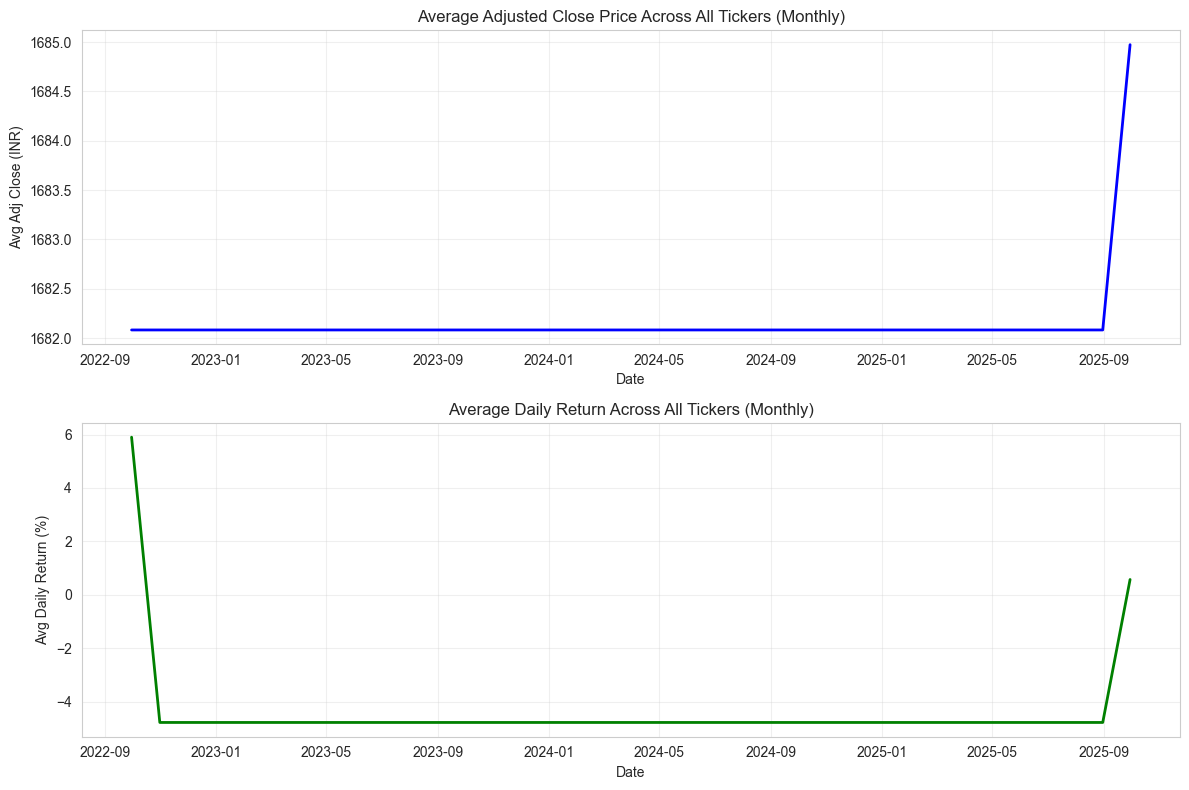

Key Insights: Overall market uptrend/downtrend? Seasonal patterns?


In [16]:
# Aggregated market trends (e.g., average close price and returns over time)
# Resample to monthly averages for smoother plot
monthly_avg = combined_df.groupby('Date').agg({
    'Adj Close': 'mean',
    'Daily Return': 'mean',
    'Volume': 'mean'
}).resample('M').mean()  # Monthly resampling

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Average Close Price over time
ax1.plot(monthly_avg.index, monthly_avg['Adj Close'], color='blue', linewidth=2)
ax1.set_title('Average Adjusted Close Price Across All Tickers (Monthly)')
ax1.set_xlabel('Date')
ax1.set_ylabel('Avg Adj Close (INR)')
ax1.grid(True, alpha=0.3)

# Average Daily Return over time
ax2.plot(monthly_avg.index, monthly_avg['Daily Return'] * 100, color='green', linewidth=2)
ax2.set_title('Average Daily Return Across All Tickers (Monthly)')
ax2.set_xlabel('Date')
ax2.set_ylabel('Avg Daily Return (%)')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Key Insights: Overall market uptrend/downtrend? Seasonal patterns?")

In [18]:
# Cell 1: Create SQLite database and table schema
import sqlite3
from sqlalchemy import create_engine, text  # Ensure 'text' is imported
import pandas as pd

# Create SQLite engine (in-memory or file-based; using file for persistence)
engine = create_engine('sqlite:///stock_data.db', echo=False)  # echo=True for SQL logs if debugging

# Define table schema (matching combined_df columns)
# We'll create the table explicitly for better control (types: DATE for Date, TEXT for Ticker, REAL for numerics)
create_table_sql = """
CREATE TABLE IF NOT EXISTS stock_prices (
    Date DATE,
    Ticker TEXT,
    Open REAL,
    High REAL,
    Low REAL,
    Close REAL,
    Adj_Close REAL,
    Volume REAL,
    Daily_Return REAL,
    SMA_20 REAL,
    SMA_50 REAL,
    Volume_Change REAL,
    Volatility_20 REAL  -- From EDA; if not present, it will be NULL
);
"""

# Execute the create table (WRAPPED IN text() for SQLAlchemy 2.0+ compatibility)
with engine.connect() as conn:
    conn.execute(text(create_table_sql))  # Key fix: Use text()
    conn.commit()

print("✓ Database 'stock_data.db' created and table 'stock_prices' ready.")
print(f"Available columns in combined_df: {combined_df.columns.tolist()}")

✓ Database 'stock_data.db' created and table 'stock_prices' ready.
Available columns in combined_df: ['Date', 'Ticker', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Daily Return', 'SMA_20', 'SMA_50', 'Volume Change', 'Volatility_20']


In [19]:
# Clean and insert combined_df into the SQL table
# Handle any remaining NaNs (fill with 0 for numerics; drop rows if critical)
combined_df_clean = combined_df.copy()
# Fill NaNs: For prices/returns, use 0; for dates/tickers, drop if any
combined_df_clean = combined_df_clean.dropna(subset=['Date', 'Ticker'])  # Drop if core columns missing
for col in ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Daily Return', 'SMA_20', 'SMA_50', 'Volume Change', 'Volatility_20']:
    if col in combined_df_clean.columns:
        combined_df_clean[col] = combined_df_clean[col].fillna(0)

# Ensure Date is in proper format (YYYY-MM-DD string for SQL)
combined_df_clean['Date'] = pd.to_datetime(combined_df_clean['Date']).dt.strftime('%Y-%m-%d')

# Rename columns if needed (SQL prefers no spaces; e.g., 'Adj Close' -> 'Adj_Close')
combined_df_clean = combined_df_clean.rename(columns={'Adj Close': 'Adj_Close', 'Daily Return': 'Daily_Return', 'SMA_20': 'SMA_20', 'SMA_50': 'SMA_50', 'Volume Change': 'Volume_Change'})

# Insert data (use to_sql for simplicity; it handles DataFrame to SQL)
combined_df_clean.to_sql('stock_prices', engine, if_exists='replace', index=False, method='multi')  # 'replace' overwrites if table exists

# Verify insertion
with engine.connect() as conn:
    row_count = conn.execute(text("SELECT COUNT(*) FROM stock_prices")).scalar()  # Wrapped for safety
    print(f"✓ Data inserted successfully! Total rows: {row_count}")
    
    # Quick preview query
    preview = pd.read_sql("SELECT * FROM stock_prices LIMIT 5", engine)
    print("\nPreview of inserted data:")
    print(preview)

✓ Data inserted successfully! Total rows: 11130

Preview of inserted data:
         Date         Ticker         Open         High          Low  \
0  2022-09-26  ADANIPORTS.NS  3614.600098  3614.600098  3614.600098   
1  2022-09-27  ADANIPORTS.NS  3614.600098  3614.600098  3614.600098   
2  2022-09-28  ADANIPORTS.NS  3614.600098  3614.600098  3614.600098   
3  2022-09-29  ADANIPORTS.NS  3614.600098  3614.600098  3614.600098   
4  2022-09-30  ADANIPORTS.NS  3614.600098  3614.600098  3614.600098   

         Close    Adj_Close       Volume  Daily_Return       SMA_20  \
0  3614.600098  3614.600098  3614.600098           0.0  3614.600098   
1  3614.600098  3614.600098  3614.600098           0.0  3614.600098   
2  3614.600098  3614.600098  3614.600098           0.0  3614.600098   
3  3614.600098  3614.600098  3614.600098           0.0  3614.600098   
4  3614.600098  3614.600098  3614.600098           0.0  3614.600098   

        SMA_50  Volume_Change  Volatility_20  
0  3614.600098          

=== SQL Summary Statistics ===


OperationalError: (sqlite3.OperationalError) no such function: SQRT
[SQL: 
SELECT 
    AVG(Close) as Avg_Close,
    MIN(Close) as Min_Close,
    MAX(Close) as Max_Close,
    AVG(Daily_Return) as Avg_Daily_Return,
    SQRT(AVG(Daily_Return * Daily_Return) - (AVG(Daily_Return) * AVG(Daily_Return))) as Std_Daily_Return,  -- Manual volatility proxy
    AVG(Volume) as Avg_Volume,
    COUNT(*) as Total_Records
FROM stock_prices
WHERE Daily_Return IS NOT NULL;  -- Exclude NULLs for accurate std dev
]
(Background on this error at: https://sqlalche.me/e/20/e3q8)